Implementation of the XOR logic using Radial Basis Function Network

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
d = {'x1':[0,0,1,1],'x2':[0,1,0,1],'d':[0,1,1,0]}
data = pd.DataFrame(data = d)
data.head()

,x1,x2,d
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


 Select the random centres,2 as mu1 and mu2 for the XOR

In [63]:
mu1=[0,0]
mu2=[1,1]
phi1=[0,0,0,0]
phi2=[0,0,0,0]

In [64]:
for i in range (4):
    phi1[i]=np.exp(-(((data['x1'][i]-mu1[0])**2)+((data['x2'][i]-mu1[1])**2)))

for i in range (4):
    phi2[i]=np.exp(-(((data['x1'][i]-mu2[0])**2)+((data['x2'][i]-mu2[1])**2)))
 
data['phi1'] = phi1
data['phi2'] = phi2
data.head()

,x1,x2,d,phi1,phi2
0,0,0,0,1.000000,0.135335
1,0,1,1,0.367879,0.367879
2,1,0,1,0.367879,0.367879
3,1,1,0,0.135335,1.000000


In [65]:
theta=[-1,-1,-1,-1]
g=np.vstack([phi1, phi2,theta])
print(g)

[[ 1.          0.36787944  0.36787944  0.13533528]
 [ 0.13533528  0.36787944  0.36787944  1.        ]
 [-1.         -1.         -1.         -1.        ]]


In [66]:
gT=g.transpose()
gplus=g.dot(gT)
print(gplus)

[[ 1.28898621  0.54134113 -1.87109417]
 [ 0.54134113  1.28898621 -1.87109417]
 [-1.87109417 -1.87109417  4.        ]]


In [67]:
gplus1=np.linalg.inv(gplus)
print(gplus1)

[[6.93202506 5.594492   5.85957325]
 [5.594492   6.93202506 5.85957325]
 [5.85957325 5.85957325 5.73190666]]


In [68]:
da=[0,1,1,0]
gpl=np.dot(gT,gplus1)

print(gpl)

[[ 1.82958397  0.67306633  0.92067359]
 [-1.25132515 -1.25132515 -1.42067359]
 [-1.25132515 -1.25132515 -1.42067359]
 [ 0.67306633  1.82958397  0.92067359]]


In [69]:
w=np.dot(da,gpl)

print(w)

[-2.5026503  -2.5026503  -2.84134719]


 Now let us plot the phi1 and phii2 for checking the linearity

In [70]:
m=-1
b=0.9
p=np.vstack([phi1, phi2])
p1=np.dot(m,p)+b
print(p1)

[[-0.1         0.53212056  0.53212056  0.76466472]
 [ 0.76466472  0.53212056  0.53212056 -0.1       ]]


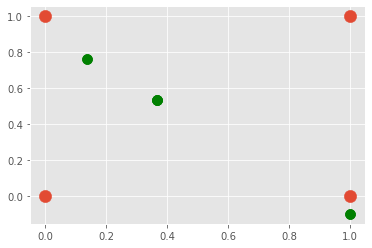

In [75]:
from matplotlib import style
style.use('ggplot')
plt.scatter(data['x1'], data['x2'], s=150)
plt.scatter(p,p1,color='green',s=100)
plt.show()